<a href="https://colab.research.google.com/github/jaiswalgaurav012002/deep_learning_project/blob/main/BIDIRECTIONAL_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn


  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
        File 

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

2024-04-28 19:12:38.644185: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 19:12:38.644307: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 19:12:38.791261: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import os
import pandas as pd

file_path = '/kaggle/input/traindata1/train.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("file has been found")
else:
    print(f"File not found: {file_path}. Please upload the dataset or correct the file path.")

file has been found


In [ ]:
import pandas as pd

# Path to your CSV file
file_path = '/kaggle/input/traindata1/train.csv'  # Update with your CSV file path

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())  # Show the first few rows

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [ ]:
df.head(20)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
!pip list


Package                                  Version
---------------------------------------- -------------------
absl-py                                  1.4.0
accelerate                               0.29.3
access                                   1.1.9
affine                                   2.4.0
aiobotocore                              2.12.3
aiofiles                                 22.1.0
aiohttp                                  3.9.1
aiohttp-cors                             0.7.0
aioitertools                             0.11.0
aiorwlock                                1.3.0
aiosignal                                1.3.1
aiosqlite                                0.19.0
albumentations                           1.4.0
alembic                                  1.13.1
altair                                   5.3.0
annotated-types                          0.6.0
annoy                                    1.17.3
anyio                                    4.2.0
apache-beam                          

In [ ]:
from tensorflow.keras.layers import TextVectorization
X = df['comment_text']
y = df[df.columns[2:]].values
MAX_FEATURES = 200000 # number of words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
vectorizer.adapt(X.values)
vectorized_text = vectorizer(X.values)
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

Epoch 1/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 667s 95ms/step - accuracy: 0.9678 - binary_accuracy: 0.9748 - categorical_accuracy: 0.9678 - loss: 0.0843 - val_accuracy: 0.9939 - val_binary_accuracy: 0.9830 - val_categorical_accuracy: 0.9939 - val_loss: 0.0468
Epoch 2/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 659s 94ms/step - accuracy: 0.9873 - binary_accuracy: 0.9824 - categorical_accuracy: 0.9873 - loss: 0.0467 - val_accuracy: 0.9944 - val_binary_accuracy: 0.9849 - val_categorical_accuracy: 0.9944 - val_loss: 0.0399
Epoch 3/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 659s 94ms/step - accuracy: 0.9912 - binary_accuracy: 0.9845 - categorical_accuracy: 0.9912 - loss: 0.0405 - val_accuracy: 0.9943 - val_binary_accuracy: 0.9867 - val_categorical_accuracy: 0.9943 - val_loss: 0.0346
Epoch 4/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 662s 95ms/step - accuracy: 0.9933 - binary_accuracy: 0.9856 - categorical_accuracy: 0.9933 - loss: 0.0372 - val_accuracy: 0.9944 - val_binary_accuracy: 0.9873 - val_categorical_accuracy: 0.9944 - v

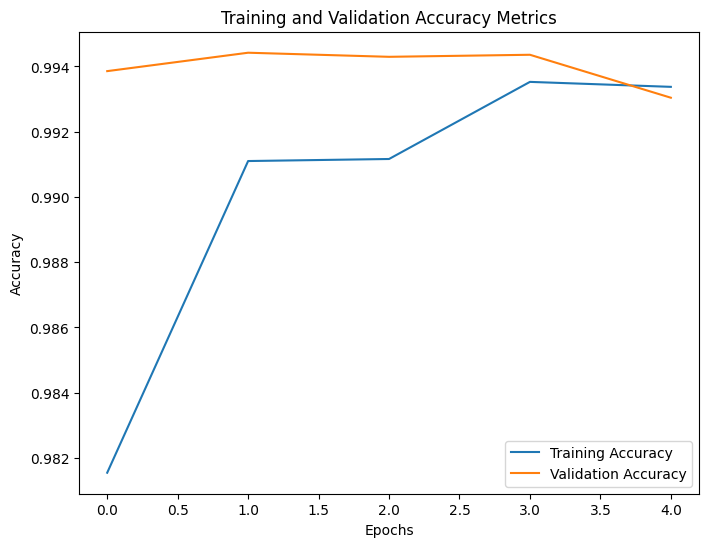

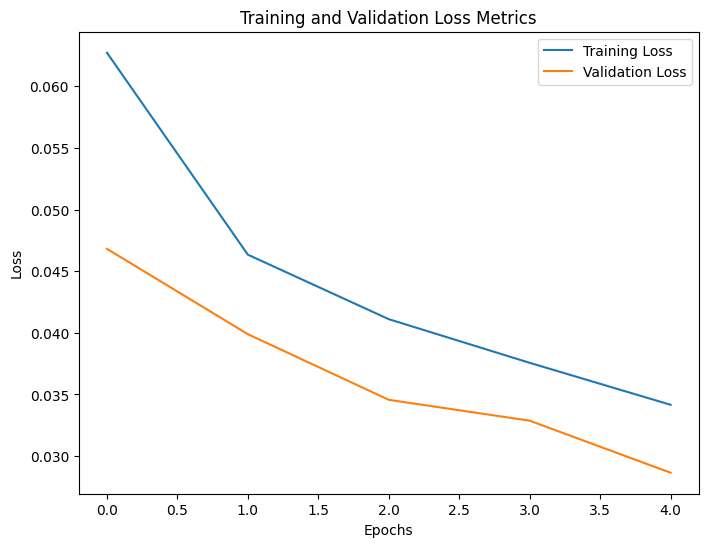

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
from tensorflow.keras.metrics import Accuracy, BinaryAccuracy, CategoricalAccuracy, Precision, Recall
import matplotlib.pyplot as plt
import pandas as pd

# Build the Sequential model
model = Sequential()

# Add embedding, LSTM, and Dense layers
model.add(Embedding(200001, 32))  # Adjust MAX_FEATURES
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))  # Output for multi-label classification

# Compile the model with different accuracy and loss metrics
model.compile(
    loss='binary_crossentropy',  # Loss for multi-label classification
    optimizer='Adam',
    metrics=[  # Add different accuracy metrics
        'accuracy',  # General accuracy
        'binary_accuracy',  # Binary accuracy
        'categorical_accuracy',  # Categorical accuracy
    ]
)

# Fit the model and capture the history
history = model.fit(
    train,
    epochs=5,  # Adjust the number of epochs
    validation_data=val,  # Include validation data
    verbose=1
)

# Plot accuracy metrics
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Metrics')
plt.legend()
plt.show()

# Plot loss metrics
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Metrics')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predictions on the test set
yhat = model.predict(test)  # Model predictions
y_true = []
for batch in test.as_numpy_iterator():
    _, y = batch  # Extract true labels
    y_true.extend(y)  # Add to the true labels list

# Convert to numpy arrays for Scikit-learn metrics
y_true = np.array(y_true).flatten()  # Flatten to 1D
yhat = np.array(yhat).flatten()  # Flatten predictions to 1D

# Calculate accuracy (binary threshold at 0.5)
accuracy = accuracy_score(y_true, yhat > 0.5)

# Calculate precision, recall, and F1 score (weighted for multi-label)
precision = precision_score(y_true, yhat > 0.5, average='weighted')  # Weighted precision
recall = recall_score(y_true, yhat > 0.5, average='weighted')  # Weighted recall
f1 = f1_score(y_true, yhat > 0.5, average='weighted')  # Weighted F1 score

# Display the calculated metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


997/997 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'y_true' contains the actual values and 'yhat' contains the predicted values
y_true = np.array(y_true)  # Convert true labels to a numpy array
yhat = np.array(yhat)  # Convert predictions to a numpy array

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, yhat)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, yhat)

# Display the calculated error metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24
Mean Absolute Error (MAE): 0.07


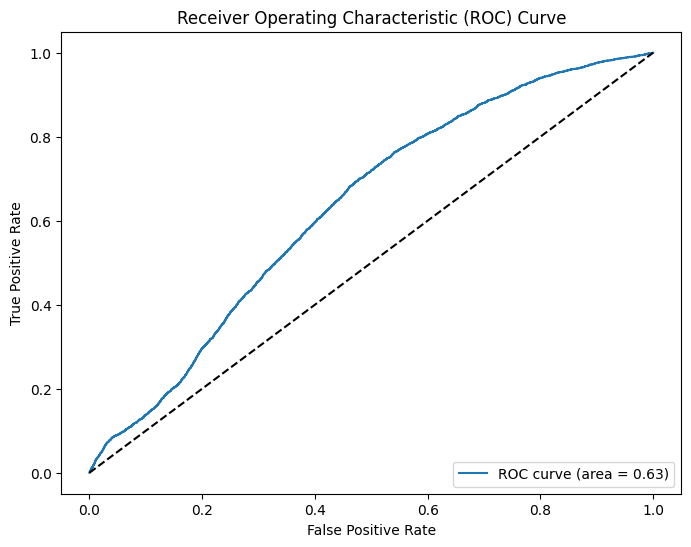

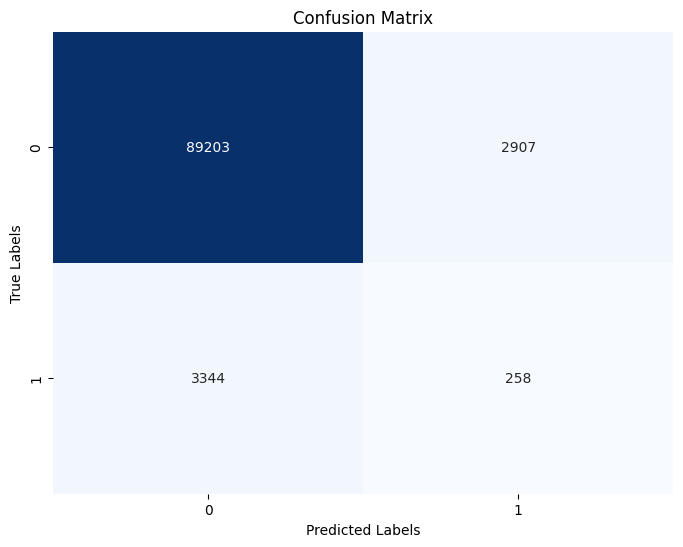

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'y_true' contains the actual values and 'yhat' contains the predicted values
y_true = np.array(y_true)  # Convert to numpy array
yhat = np.array(yhat)  # Convert predictions to numpy array

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, yhat)  # ROC curve
roc_auc = roc_auc_score(y_true, yhat)  # AUC score

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')  # Legend at the bottom right
plt.show()  # Display the plot

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, yhat > 0.5)  # Confusion matrix with a threshold of 0.5

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)  # Annotated heatmap
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()  # Display the plot


In [ ]:
# Example input text
input_text = 'You freaking suck! I am going to hit you.'

# Vectorize the text input and ensure it has a batch dimension
vectorized_text = vectorizer(tf.constant([input_text]))  # Wrap the input in a list for batch dimension

# Make a prediction
res = model.predict(vectorized_text)

# Convert the result to binary (threshold at 0.5)
binary_res = (res > 0.5).astype(int)

print("Prediction:", binary_res)  # Display the prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Prediction: [[1 0 1 0 1 0]]
